In [2]:
from dynamodelx import UFA
from sklearn.datasets import make_regression
from dynamodelx.plots import draw_plots

In [3]:
output_dim = 2

X, y  = make_regression(
    n_samples = 1000,
    n_features = 8,
    n_informative = 2,
    n_targets = output_dim
)

In [ ]:
ufa = UFA(
    task='regression', 
    model_size='small', 
    input_dim=X.shape[1],
    output_dim=output_dim,
    loss='mean_square_loss',
    device='cuda',
    custom_architecture=None, 
    weights_init='he', 
    hidden_activation='relu',
    optimizer='adamw',
    return_metrics=True,
    auto_build=False, # Model wont't be build, we need to call build() function explicitly.
    multiclass=False,
    uncertainty=False
)

ufa.build()

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=50,
                    learning_rate=0.01,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=32
                )

Model Configuration:

  Task:               regression
  Model Size:         small
  Input Dimension:    8
  Output Dimension:   2
  Loss                mean_square_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adamw
  Weights Init:       he
  Uncertainty:        False
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=2, bias=True)

Total parameters: 2,722
Trainable parameters: 2,722
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 1.259827503476824 
Average validation loss per sample : 2.3206843948364257

Average test loss per sample: 2.2913128662109377


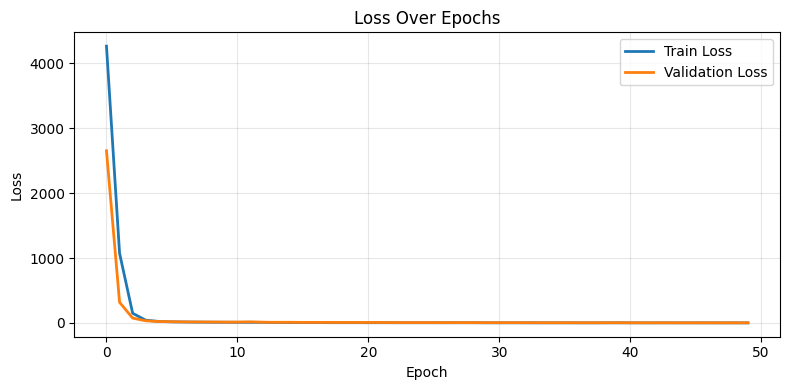

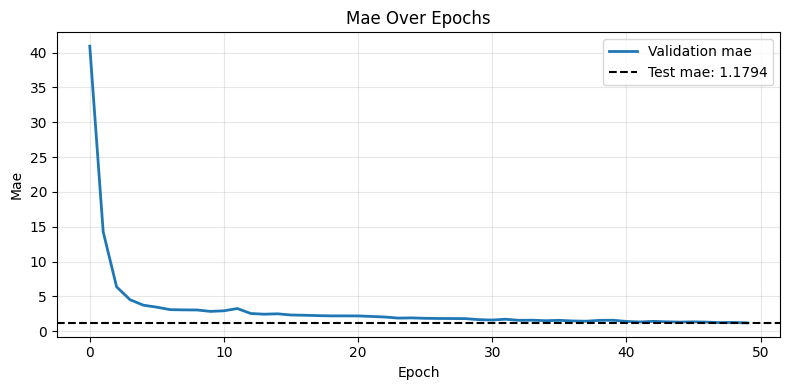

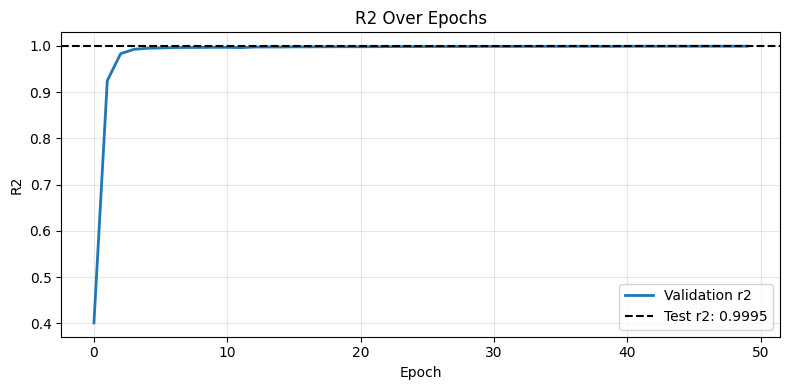

In [7]:
draw_plots(performance)

In [8]:
performance.test

{'test_mae': 1.179369330406189, 'test_r2': 0.9994786977767944}

In [9]:
predictions = ufa.predict(X[:5])
print(predictions)

[[ 40.643654  20.737396]
 [-30.755087 -13.62354 ]
 [-22.615732 -15.211283]
 [ 66.46081   19.266901]
 [122.924     91.73509 ]]


In [11]:
ufa.save(path='multivariate_regression.pt')

Model successfully saved to: multivariate_regression.pt
